# Iteração de política

Este notebook tem como objetivo implementar a técnica de iteração política

In [6]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%pylab inline
import random

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


/home/victor/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [21]:
gamma = 1 # taxa de desconto
tamanho_recompensa = -1
tamanho_grade = 4
estados_terminais = [[0,0], [tamanho_grade-1, tamanho_grade-1]]
acoes = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numero_iteracoes = 1000

In [22]:
def recompensa_acao(posicao_inicial, acao):
    # Checa a condicao de parada
    if posicao_inicial in estados_terminais:
        return posicao_inicial, 0
    
    recompensa = tamanho_recompensa
    posicao_final = np.array(posicao_inicial) + np.array(acao)
    if -1 in posicao_final or 4 in posicao_final: 
        posicao_final = posicao_inicial
        
    return posicao_final, recompensa

In [23]:
mapa_valor = np.zeros((tamanho_grade, tamanho_grade))
estados = [[i, j] for i in range(tamanho_grade) for j in range(tamanho_grade)]

In [24]:
# values of the value function at step 0
mapa_valores

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
deltas = []
for it in range(numero_iteracoes):
    copia_mapa_valor = np.copy(mapa_valores)
    estados_delta = []
    for estado in estados:
        recompensa_ponderada = 0
        for acao in acoes:
            posicao_final, recompensa = recompensa_acao(estado, acao)
            recompensa_ponderada += (1/len(acoes))*(recompensa+(gamma*mapa_valor[posicao_final[0], posicao_final[1]]))
        estados_delta.append(np.abs(copia_mapa_valor[estado[0], estado[1]]-recompensa_ponderada))
        copia_mapa_valor[estado[0], estado[1]] = recompensa_ponderada
    deltas.append(estados_delta)
    mapa_valor = copia_mapa_valor
    if it in [0,1,2,9, 99, numero_iteracoes-1]:
        print("Iteracao {}".format(it+1))
        print(mapa_valor)
        print("")

Iteracao 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteracao 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

Iteracao 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

Iteracao 10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]

Iteracao 100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]

Iteracao 1000
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]



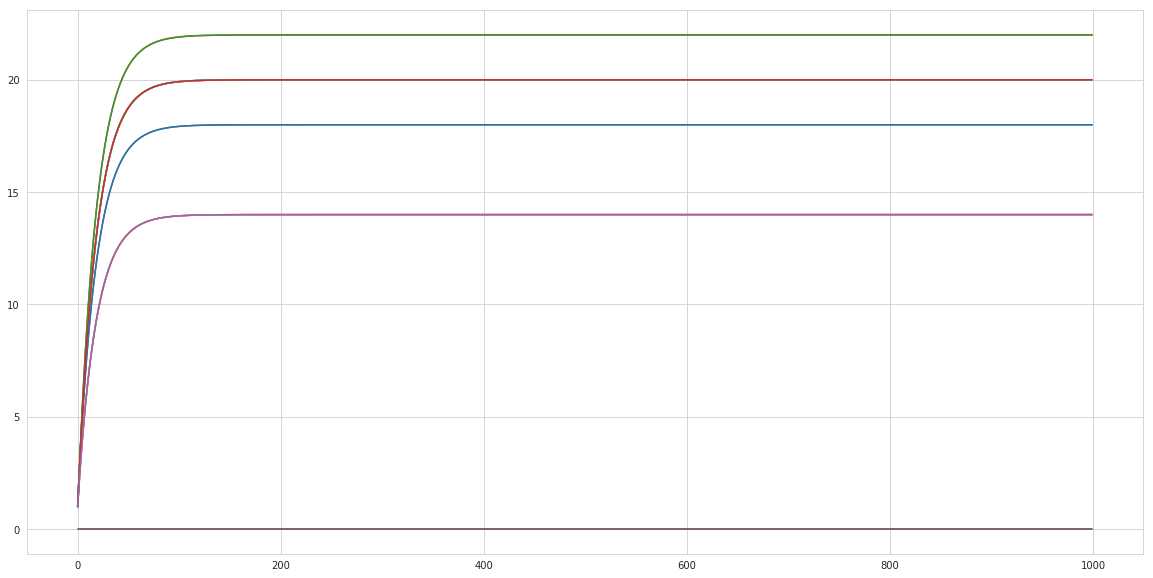

In [26]:
_ = plt.figure(figsize=(20, 10))
_ = plt.plot(deltas)